In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR10('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR10('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
activation = F.relu
architecture = [int(32*32*3), 256, 64, 10]
supervised_lambda_weight = 1e-3
neural_lr_start = 0.1 
neural_lr_stop = 0.05 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = SupervisedPredictiveCodingNudgedV2_wAutoGrad(architecture, activation, use_stepLR = True, 
                                                   sgd_nesterov = False, optimizer_type = "sgd", 
                                                   optim_lr = 1e-3, stepLR_step_size = 10*3000,)

In [5]:
# x, y = next(iter(train_loader))
# x, y = x.to(device), y.to(device)
# x = x.to(device).view(x.size(0),-1).T
# y_one_hot = F.one_hot(y, 10).to(device).T

# neurons = model.fast_forward(x, no_grad = True)
# model.run_neural_dynamics(x, y_one_hot, neurons, supervised_lambda_weight, 
#                           neural_lr_start, neural_lr_stop, lr_rule = neural_lr_rule, 
#                           lr_decay_multiplier = neural_lr_decay_multiplier, 
#                           neural_dynamic_iterations = neural_dynamic_iterations)

In [6]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 15

for epoch_ in range(n_epochs):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [04:21,  9.55it/s]
1it [00:00,  8.85it/s]

Epoch : 1, Train Accuracy : 0.41906, Test Accuracy : 0.4083


2500it [04:22,  9.52it/s]
2it [00:00, 14.10it/s]

Epoch : 2, Train Accuracy : 0.46654, Test Accuracy : 0.4427


2500it [02:44, 15.22it/s]
2it [00:00, 14.66it/s]

Epoch : 3, Train Accuracy : 0.50948, Test Accuracy : 0.4637


2500it [02:42, 15.37it/s]
2it [00:00, 14.09it/s]

Epoch : 4, Train Accuracy : 0.53928, Test Accuracy : 0.4868


2500it [02:45, 15.09it/s]
2it [00:00, 14.68it/s]

Epoch : 5, Train Accuracy : 0.5675, Test Accuracy : 0.4967


2500it [02:42, 15.39it/s]
2it [00:00, 14.32it/s]

Epoch : 6, Train Accuracy : 0.58388, Test Accuracy : 0.4988


2500it [02:46, 15.01it/s]
2it [00:00, 14.27it/s]

Epoch : 7, Train Accuracy : 0.60738, Test Accuracy : 0.5077


2500it [03:23, 12.27it/s]
1it [00:00,  8.56it/s]

Epoch : 8, Train Accuracy : 0.62008, Test Accuracy : 0.5052


2500it [04:46,  8.73it/s]
1it [00:00,  7.83it/s]

Epoch : 9, Train Accuracy : 0.62874, Test Accuracy : 0.5031


2500it [04:42,  8.84it/s]
1it [00:00,  8.91it/s]

Epoch : 10, Train Accuracy : 0.63396, Test Accuracy : 0.5003


2500it [04:26,  9.39it/s]
1it [00:00,  6.35it/s]

Epoch : 11, Train Accuracy : 0.65004, Test Accuracy : 0.5001


2500it [04:22,  9.51it/s]
1it [00:00,  8.62it/s]

Epoch : 12, Train Accuracy : 0.67294, Test Accuracy : 0.5096


2500it [04:24,  9.45it/s]
1it [00:00,  8.77it/s]

Epoch : 13, Train Accuracy : 0.69206, Test Accuracy : 0.5196


2500it [02:57, 14.07it/s]
2it [00:00, 14.88it/s]

Epoch : 14, Train Accuracy : 0.6891, Test Accuracy : 0.5087


2500it [02:43, 15.27it/s]


Epoch : 15, Train Accuracy : 0.70614, Test Accuracy : 0.5137


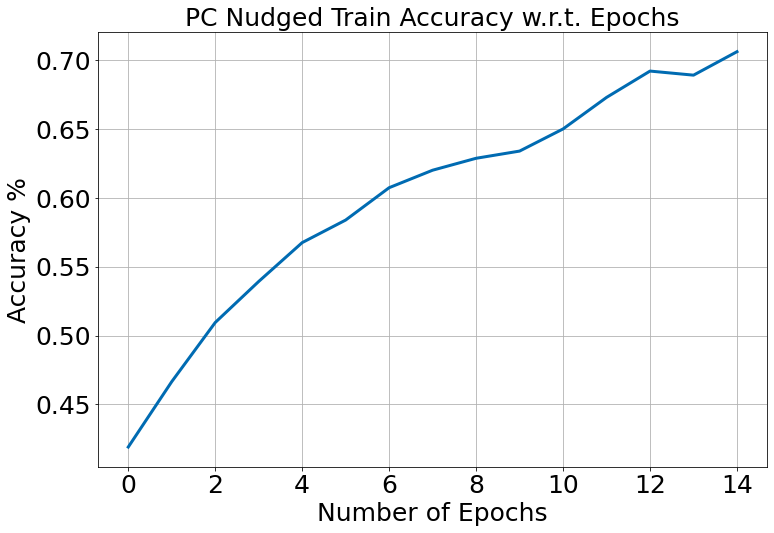

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

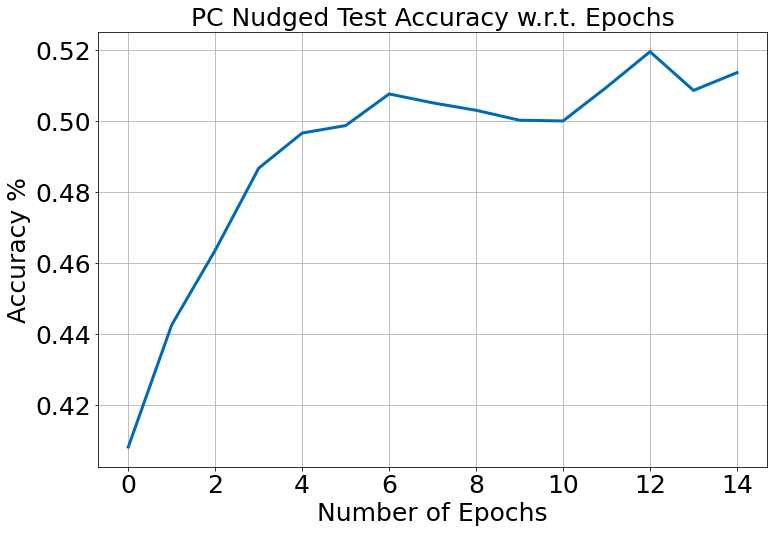

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)